In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,chisquare
import numpy as np

In [2]:
#data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_fluid_comm.csv')
#data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_fluid_comm.csv')
data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_list_comm.csv')
data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_list_comm.csv')

arms2data_arms1comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_list_ARMS2data_ARMS1pred.csv')
arms1data_arms2comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_list_ARMS1data_ARMS2pred.csv')
#arms2data_arms1comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_fluid_ARMS2data_ARMS1pred.csv')
#arms1data_arms2comm = pd.read_csv('/home/faird/lundq163/projects/FRF_results_viz/GBM_work/id_predictions_fluid_ARMS1data_ARMS2pred.csv')

data_arms1

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [3]:
communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]
filtered_data_arms1

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [4]:
#merge in latest version of participants.tsv
participant_demographics = pd.read_csv("/home/midb-ig/shared/projects/ABCD/Automated_QC/brain_coverage/participants.tsv", sep='\t')
participant_demographics = participant_demographics.rename(columns={'participant_id':'subject_id'})
participant_demographics['subject_id'] = participant_demographics['subject_id'].str.replace('sub-NDAR', 'NDAR_')
participant_demographics_first_ses = participant_demographics.drop_duplicates(subset='subject_id', keep='first')
participant_demographics_first_ses

,subject_id,session_id,collection_3165,site,scanner_manufacturer,scanner_model,scanner_software,matched_group,sex,White,...,bc_rest_run-1,bc_rest_run-2,bc_nback_run-1,bc_nback_run-2,#subcortical_segmentation_vol_out (n=22),#cortical_morphometry_sulc_out (n=333),5min_pconn,10min_pconn,#pconn_out_5min (n=61776),#pconn_out_10min (n=61776)
0,NDAR_INV003RTV85,ses-baselineYear1Arm1,1,site06,SIEMENS,Prisma_fit,syngo MR E11,1,2,1,...,Pass,Pass,Pass,Pass,0.0,3.0,Pass,Pass,89.0,75.0
1,NDAR_INV005V6D2C,ses-baselineYear1Arm1,0,site10,GE MEDICAL SYSTEMS,DISCOVERY MR750,"[27, LX, MR Software release:DV26.0_R01_1725.a]",2,2,1,...,Pass,Pass,Pass,Pass,1.0,7.0,Fail,Fail,NaN,NaN
2,NDAR_INV007W6H7B,ses-baselineYear1Arm1,1,site22,GE MEDICAL SYSTEMS,DISCOVERY MR750,"[25, LX, MR Software release:DV25.0_R02_1549.b]",1,1,1,...,Pass,Pass,Pass,Pass,3.0,0.0,Pass,Pass,125.0,125.0
3,NDAR_INV00BD7VDC,ses-baselineYear1Arm1,1,site07,SIEMENS,Prisma_fit,syngo MR E11,1,1,1,...,Pass,Pass,Pass,Pass,0.0,1.0,Pass,Pass,111.0,101.0
4,NDAR_INV00CY2MDM,ses-2YearFollowUpYArm1,1,site20,SIEMENS,Prisma,syngo MR E11,1,1,1,...,Pass,Pass,Pass,Pass,0.0,3.0,Pass,Pass,115.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22942,NDAR_INVZZPKBDAC,ses-baselineYear1Arm1,0,site12,SIEMENS,Prisma_fit,syngo MR E11,1,2,1,...,Pass,Pass,Pass,Pass,0.0,0.0,Pass,Pass,310.0,399.0
22944,NDAR_INVZZZ2ALR6,ses-6YearFollowUpYArm1,0,888,888,888,888,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Fail,NaN,NaN
22947,NDAR_INVZZZNB0XC,ses-baselineYear1Arm1,1,site03,SIEMENS,Prisma,syngo MR E11,2,2,1,...,Pass,Fail,Pass,Fail,1.0,0.0,Pass,Pass,19.0,22.0
22949,NDAR_INVZZZP87KR,ses-2YearFollowUpYArm1,1,site19,Philips Medical Systems,Ingenia,"[5.3.1, 5.3.1.2]",2,2,0,...,NaN,NaN,NaN,NaN,1.0,NaN,Fail,Fail,NaN,NaN


In [5]:
data_arms1_demo = filtered_data_arms1.merge(participant_demographics_first_ses, on='subject_id', how='left')
data_arms2_demo = filtered_data_arms2.merge(participant_demographics_first_ses, on='subject_id', how='left')
data_arms1comm_xgb_demo = arms2data_arms1comm.merge(participant_demographics_first_ses, on='subject_id', how='left')
data_arms2comm_xgb_demo = arms1data_arms2comm.merge(participant_demographics_first_ses, on='subject_id', how='left')
data_arms1_demo.dtypes

subject_id                                            object
community                                              int64
session_id                                            object
collection_3165                                        int64
site                                                  object
scanner_manufacturer                                  object
scanner_model                                         object
scanner_software                                      object
matched_group                                          int64
sex                                                    int64
White                                                  int64
Black/African American                                 int64
American Indian, Native American                       int64
Alaska Native                                          int64
Native Hawaiian                                        int64
Guamanian                                              int64
Samoan                  

In [6]:
data_arms1_demo = data_arms1_demo.drop(['session_id','collection_3165','site','scanner_manufacturer','scanner_model','scanner_software','matched_group','bc_MID_run-2','bc_SST_run-1','bc_MID_run-1','bc_rest_run-1','bc_rest_run-2','bc_nback_run-1','bc_nback_run-2','#subcortical_segmentation_vol_out (n=22)','#cortical_morphometry_sulc_out (n=333)','5min_pconn','10min_pconn','#pconn_out_5min (n=61776)','#pconn_out_10min (n=61776)'], axis=1)
data_arms2_demo = data_arms2_demo.drop(['session_id','collection_3165','site','scanner_manufacturer','scanner_model','scanner_software','matched_group','bc_MID_run-2','bc_SST_run-1','bc_MID_run-1','bc_rest_run-1','bc_rest_run-2','bc_nback_run-1','bc_nback_run-2','#subcortical_segmentation_vol_out (n=22)','#cortical_morphometry_sulc_out (n=333)','5min_pconn','10min_pconn','#pconn_out_5min (n=61776)','#pconn_out_10min (n=61776)'], axis=1)
data_arms1comm_xgb_demo = data_arms1comm_xgb_demo.drop(['session_id','collection_3165','site','scanner_manufacturer','scanner_model','scanner_software','matched_group','bc_MID_run-2','bc_SST_run-1','bc_MID_run-1','bc_rest_run-1','bc_rest_run-2','bc_nback_run-1','bc_nback_run-2','#subcortical_segmentation_vol_out (n=22)','#cortical_morphometry_sulc_out (n=333)','5min_pconn','10min_pconn','#pconn_out_5min (n=61776)','#pconn_out_10min (n=61776)'], axis=1)
data_arms2comm_xgb_demo = data_arms2comm_xgb_demo.drop(['session_id','collection_3165','site','scanner_manufacturer','scanner_model','scanner_software','matched_group','bc_MID_run-2','bc_SST_run-1','bc_MID_run-1','bc_rest_run-1','bc_rest_run-2','bc_nback_run-1','bc_nback_run-2','#subcortical_segmentation_vol_out (n=22)','#cortical_morphometry_sulc_out (n=333)','5min_pconn','10min_pconn','#pconn_out_5min (n=61776)','#pconn_out_10min (n=61776)'], axis=1)
data_arms1_demo

,subject_id,community,sex,White,Black/African American,"American Indian, Native American",Alaska Native,Native Hawaiian,Guamanian,Samoan,...,age,handedness,siblings_twins,income,participant_education,parental_education,anesthesia_exposure,pc1,pc2,pc3
0,NDAR_INV003RTV85,7,2,1,0,0,0,0,0,0,...,131,1,0,8,5,13,0,0.278102,0.340003,0.237957
1,NDAR_INV007W6H7B,7,1,1,0,0,0,0,0,0,...,126,1,0,10,4,19,2,0.983973,0.098231,0.797205
2,NDAR_INV00BD7VDC,5,1,1,0,0,0,0,0,0,...,112,1,0,10,4,20,1,0.150013,0.839135,0.862830
3,NDAR_INV00HEV6HB,1,1,0,1,0,0,0,0,0,...,149,888,0,999,7,888,0,0.050440,-0.000863,-0.406094
4,NDAR_INV00LH735Y,8,1,1,0,0,0,0,0,0,...,109,1,0,6,3,13,0,-1.035351,-1.182294,0.436951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,NDAR_INVZY8L7CT1,4,1,1,0,0,0,0,0,0,...,130,2,0,7,5,21,1,0.493073,-0.409751,-0.746371
3142,NDAR_INVZYC44GB8,2,1,1,0,0,0,0,0,0,...,131,1,888,10,5,21,1,0.910144,0.814503,-1.084629
3143,NDAR_INVZZ05KY5J,1,1,0,1,0,0,0,0,0,...,122,2,1,4,4,13,0,-0.920924,-0.326607,-0.000983
3144,NDAR_INVZZFG6J5U,4,2,1,0,0,0,0,0,0,...,129,1,0,7,4,19,2,-0.313337,0.371288,-0.997517


In [7]:
data_arms1_race = data_arms1_demo.drop(['sex','age','handedness','siblings_twins','income','participant_education','parental_education','anesthesia_exposure','pc1','pc2','pc3'], axis=1)
data_arms2_race = data_arms2_demo.drop(['sex','age','handedness','siblings_twins','income','participant_education','parental_education','anesthesia_exposure','pc1','pc2','pc3'], axis=1)
data_arms1comm_xgb_race = data_arms1comm_xgb_demo.drop(['sex','age','handedness','siblings_twins','income','participant_education','parental_education','anesthesia_exposure','pc1','pc2','pc3'], axis=1)
data_arms2comm_xgb_race = data_arms2comm_xgb_demo.drop(['sex','age','handedness','siblings_twins','income','participant_education','parental_education','anesthesia_exposure','pc1','pc2','pc3'], axis=1)
#to be used at bottom
data_arms1_race

,subject_id,community,White,Black/African American,"American Indian, Native American",Alaska Native,Native Hawaiian,Guamanian,Samoan,Other Pacific Islander,...,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Other Race,Refuse to Answer,Don't Know,Do you consider the child Hispanic/Latino/Latina?
0,NDAR_INV003RTV85,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,NDAR_INV007W6H7B,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,NDAR_INV00BD7VDC,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,NDAR_INV00HEV6HB,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,NDAR_INV00LH735Y,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,NDAR_INVZY8L7CT1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3142,NDAR_INVZYC44GB8,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3143,NDAR_INVZZ05KY5J,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3144,NDAR_INVZZFG6J5U,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## restart here for viz


Count by community and sex:
sex          1    2  3
community             
1          324  307  0
2          275  385  1
3          154  261  0
4          245  204  0
5          186  141  0
6          137  130  0
7           88   96  0
8           52   56  0
9           55   49  0


<Figure size 1000x600 with 0 Axes>

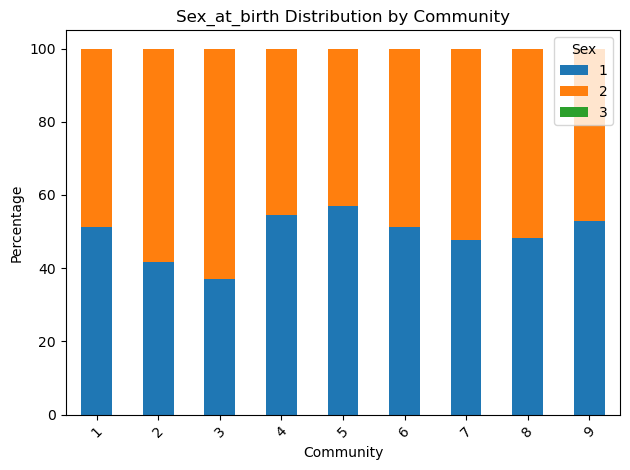

In [8]:
#sex
df = data_arms1_demo

# Create a crosstab of the data
demographics = pd.crosstab(df['community'], df['sex'], normalize='index') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
demographics.plot(kind='bar', stacked=True)

plt.title('Sex_at_birth Distribution by Community')
plt.xlabel('Community')
plt.ylabel('Percentage')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.tight_layout()

# If you want to see the actual numbers:
print("\nCount by community and sex:")
print(pd.crosstab(df['community'], df['sex']))

In [85]:
#income
df_income = pd.crosstab(data_arms2comm_xgb_demo['community'], data_arms2comm_xgb_demo['income'])
df_income

income,1,2,3,4,5,6,7,8,9,10,777,888,999
community,,,,,,,,,,,,,
0,12,9,6,10,22,43,81,106,275,147,24,79,24
1,11,12,11,14,24,26,47,46,132,40,18,31,10
2,6,9,12,16,22,22,52,50,155,40,12,44,20
3,17,16,19,19,30,28,63,63,118,49,24,44,23
4,19,21,11,18,24,30,49,39,71,25,15,25,11
5,7,10,6,13,11,23,49,57,118,51,8,45,13
6,2,3,2,1,4,3,18,18,42,32,5,12,2


In [86]:
df_income_2 = pd.DataFrame(df_income)
df_income_2

income,1,2,3,4,5,6,7,8,9,10,777,888,999
community,,,,,,,,,,,,,
0,12,9,6,10,22,43,81,106,275,147,24,79,24
1,11,12,11,14,24,26,47,46,132,40,18,31,10
2,6,9,12,16,22,22,52,50,155,40,12,44,20
3,17,16,19,19,30,28,63,63,118,49,24,44,23
4,19,21,11,18,24,30,49,39,71,25,15,25,11
5,7,10,6,13,11,23,49,57,118,51,8,45,13
6,2,3,2,1,4,3,18,18,42,32,5,12,2


In [87]:
#reduce income descriptions for visualization purposes
def combine_columns(df, column_groups):
    df = df.astype(float)
    combined = {}
    for group_name, column_names in column_groups.items():
        group_columns = [col for col in df.columns if any(str(col) == str(name) for name in column_names)]
        #group_columns = [col for col in df.columns if any(str(col).startswith(str(name)) for name in column_names)]
        combined[group_name] = df[group_columns].sum(axis=1)
    combined_df = pd.DataFrame(combined)
    return combined_df

column_groups = {
    'poverty': ['1', '2', '3', '4'],
    'low': ['5', '6'],
    'middle': ['7', '8'],
    'high': ['9'],
    'extravagent': ['10']
}

combined_df_income = combine_columns(df_income_2, column_groups)
print(combined_df_income)

           poverty   low  middle   high  extravagent
community                                           
0             37.0  65.0   187.0  275.0        147.0
1             48.0  50.0    93.0  132.0         40.0
2             43.0  44.0   102.0  155.0         40.0
3             71.0  58.0   126.0  118.0         49.0
4             69.0  54.0    88.0   71.0         25.0
5             36.0  34.0   106.0  118.0         51.0
6              8.0   7.0    36.0   42.0         32.0


In [88]:
normalized_df = combined_df_income.apply(lambda row: row / row.sum(), axis=1)
normalized_df

,poverty,low,middle,high,extravagent
community,,,,,
0,0.052039,0.091421,0.263010,0.386779,0.206751
1,0.132231,0.137741,0.256198,0.363636,0.110193
2,0.111979,0.114583,0.265625,0.403646,0.104167
3,0.168246,0.137441,0.298578,0.279621,0.116114
4,0.224756,0.175896,0.286645,0.231270,0.081433
5,0.104348,0.098551,0.307246,0.342029,0.147826
6,0.064000,0.056000,0.288000,0.336000,0.256000


            poverty       low    middle      high  extravagent
community                                                     
0          0.052039  0.091421  0.263010  0.386779     0.206751
1          0.132231  0.137741  0.256198  0.363636     0.110193
2          0.111979  0.114583  0.265625  0.403646     0.104167
3          0.168246  0.137441  0.298578  0.279621     0.116114
4          0.224756  0.175896  0.286645  0.231270     0.081433
5          0.104348  0.098551  0.307246  0.342029     0.147826
6          0.064000  0.056000  0.288000  0.336000     0.256000


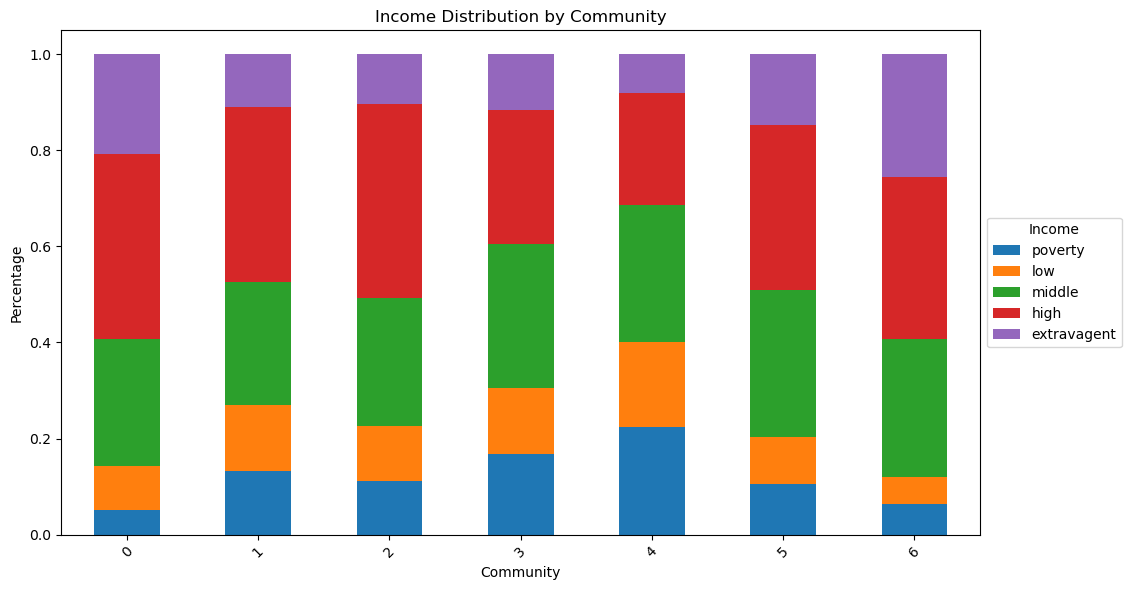

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))
normalized_df.plot(kind='bar', stacked=True, ax=ax)

# Add title, axis labels, and rotate x-axis labels
plt.title('Income Distribution by Community')
plt.xlabel('Community')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Adjust the legend position
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(title='Income', loc='center left', bbox_to_anchor=(1, 0.5))

print(normalized_df)

plt.tight_layout()
plt.show()

In [60]:
# Create the contingency table
contingency_table = pd.crosstab(df['community'], df['sex'])
contingency_table

sex,1,2,3
community,,,
1,324,307,0
2,275,385,1
3,154,261,0
4,245,204,0
5,186,141,0
6,137,130,0
7,88,96,0
8,52,56,0
9,55,49,0


In [61]:
contingency_table_plot = contingency_table.copy()
contingency_table_plot['Total'] = contingency_table_plot.sum(axis=1)
totals = contingency_table_plot.sum()
contingency_table_plot.loc['Total'] = totals
print(contingency_table_plot)

sex           1     2  3  Total
community                      
1           324   307  0    631
2           275   385  1    661
3           154   261  0    415
4           245   204  0    449
5           186   141  0    327
6           137   130  0    267
7            88    96  0    184
8            52    56  0    108
9            55    49  0    104
Total      1516  1629  1   3146


In [62]:
dof_test = contingency_table.size - sum(contingency_table.shape) + contingency_table.ndim - 1
dof_test

16

In [63]:
# Perform chi-square test of homogeneity
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.5g}")
print(f"p-value: {p_value:.5g}")
print(f"\nDegrees of freedom: {dof}")
print("\nContingency table (observed frequencies):")
print(contingency_table)
print("\nExpected frequencies:")
print(pd.DataFrame(expected, 
                  index=contingency_table.index, 
                  columns=contingency_table.columns))

#Interpreting the results:

#If p-value < 0.05, reject null hypothesis: there is evidence that sex_at_birth differs across subgroups
#If p-value ≥ 0.05, fail to reject the null hypothesis: there is no evidence sex_at_birth differs across subgroups

#You might also want to look at the standardized residuals to see which specific cells contribute most to any significant difference:

Chi-square statistic: 57.111
p-value: 1.5931e-06

Degrees of freedom: 16

Contingency table (observed frequencies):
sex          1    2  3
community             
1          324  307  0
2          275  385  1
3          154  261  0
4          245  204  0
5          186  141  0
6          137  130  0
7           88   96  0
8           52   56  0
9           55   49  0

Expected frequencies:
sex                 1           2         3
community                                  
1          304.067387  326.732041  0.200572
2          318.523840  342.266052  0.210108
3          199.980928  214.887158  0.131914
4          216.364908  232.492371  0.142721
5          157.575334  169.320725  0.103942
6          128.662428  138.252702  0.084870
7           88.666243   95.275270  0.058487
8           52.043229   55.922441  0.034329
9           50.115702   53.851240  0.033058


In [64]:
expected[1]

array([3.18523840e+02, 3.42266052e+02, 2.10108074e-01])

In [65]:
# do something like this row by row for each community
# statistic, pvalue = chisquare(f_obs, f_exp)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df)
expected_df.iloc[i,:]

sex                 1           2         3
community                                  
1          304.067387  326.732041  0.200572
2          318.523840  342.266052  0.210108
3          199.980928  214.887158  0.131914
4          216.364908  232.492371  0.142721
5          157.575334  169.320725  0.103942
6          128.662428  138.252702  0.084870
7           88.666243   95.275270  0.058487
8           52.043229   55.922441  0.034329
9           50.115702   53.851240  0.033058


sex
1    50.115702
2    53.851240
3     0.033058
Name: 9, dtype: float64

In [66]:
for i in range(contingency_table.shape[0]):
    observed_indv = contingency_table.iloc[i,:]
    expected_indv = expected_df.iloc[i,:]
    chi2_indv, p_indv = chisquare(observed_indv, expected_indv)
    print(f"Community {i+1}:")
    print(f"Observed values: {observed_indv.tolist()}")
    print(f"Expected values: {expected_indv.tolist()}")
    print(f"Chi-square statistic: {chi2_indv:.5g}")
    print(f"p-value: {p_indv:.5g}")
    print()
#build CI contrast to see which one is different. pairwise CI of the contrast
# visualize this difference between the groups (talk to Michael)

Community 1:
Observed values: [324, 307, 0]
Expected values: [304.06738715829624, 326.7320406865861, 0.20057215511760967]
Chi-square statistic: 2.6989
p-value: 0.25939

Community 2:
Observed values: [275, 385, 1]
Expected values: [318.5238397965671, 342.2660521296885, 0.21010807374443738]
Chi-square statistic: 14.252
p-value: 0.00080379

Community 3:
Observed values: [154, 261, 0]
Expected values: [199.98092816274635, 214.8871582962492, 0.1319135410044501]
Chi-square statistic: 20.6
p-value: 3.3641e-05

Community 4:
Observed values: [245, 204, 0]
Expected values: [216.36490781945326, 232.49237126509854, 0.14272091544818818]
Chi-square statistic: 7.4243
p-value: 0.024425

Community 5:
Observed values: [186, 141, 0]
Expected values: [157.57533375715195, 169.32072472981565, 0.10394151303242212]
Chi-square statistic: 9.9684
p-value: 0.0068454

Community 6:
Observed values: [137, 130, 0]
Expected values: [128.6624284806103, 138.25270184361094, 0.08486967577876668]
Chi-square statistic: 1.11

In [67]:
# Calculate standardized residuals
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
residuals_df = pd.DataFrame(residuals,
                          index=contingency_table.index,
                          columns=contingency_table.columns)
print("\nStandardized residuals:")
print(residuals_df)

#Residuals with absolute values > 1.96 suggest that cell is a major contributor to the chi-square statistic (at α = 0.05).


Standardized residuals:
sex               1         2         3
community                              
1          1.143087 -1.091632 -0.447853
2         -2.438688  2.309889  1.723242
3         -3.251498  3.145695 -0.363199
4          1.946728 -1.868634 -0.377784
5          2.264390 -2.176453 -0.322400
6          0.735045 -0.701874 -0.291324
7         -0.070754  0.074248 -0.241841
8         -0.005992  0.010371 -0.185282
9          0.689946 -0.661081 -0.181818


# redoing statistics for income

In [90]:
combined_df_income

,poverty,low,middle,high,extravagent
community,,,,,
0,37.0,65.0,187.0,275.0,147.0
1,48.0,50.0,93.0,132.0,40.0
2,43.0,44.0,102.0,155.0,40.0
3,71.0,58.0,126.0,118.0,49.0
4,69.0,54.0,88.0,71.0,25.0
5,36.0,34.0,106.0,118.0,51.0
6,8.0,7.0,36.0,42.0,32.0


In [91]:
combined_df_income_totals = combined_df_income.copy()
combined_df_income_totals['Total'] = combined_df_income_totals.sum(axis=1)
totals_income = combined_df_income_totals.sum()
combined_df_income_totals.loc['Total'] = totals_income
print(combined_df_income_totals)

           poverty    low  middle   high  extravagent   Total
community                                                    
0             37.0   65.0   187.0  275.0        147.0   711.0
1             48.0   50.0    93.0  132.0         40.0   363.0
2             43.0   44.0   102.0  155.0         40.0   384.0
3             71.0   58.0   126.0  118.0         49.0   422.0
4             69.0   54.0    88.0   71.0         25.0   307.0
5             36.0   34.0   106.0  118.0         51.0   345.0
6              8.0    7.0    36.0   42.0         32.0   125.0
Total        312.0  312.0   738.0  911.0        384.0  2657.0


In [92]:
dof_test_income = combined_df_income.size - sum(combined_df_income.shape) + combined_df_income.ndim - 1
dof_test_income

24

In [93]:
# Perform chi-square test of homogeneity
chi2_income, p_value_income, dof_income, expected_income = chi2_contingency(combined_df_income)

print(f"Chi-square statistic: {chi2_income:.5g}")
print(f"p-value: {p_value_income:.5g}")
print(f"\nDegrees of freedom: {dof_income}")
print("\nContingency table (observed frequencies):")
print(combined_df_income)
print("\nExpected frequencies:")
print(pd.DataFrame(expected_income, 
                  index=combined_df_income.index, 
                  columns=combined_df_income.columns))

#Interpreting the results:

#If p-value < 0.05, reject null hypothesis: there is evidence that sex_at_birth differs across subgroups
#If p-value ≥ 0.05, fail to reject the null hypothesis: there is no evidence sex_at_birth differs across subgroups

#You might also want to look at the standardized residuals to see which specific cells contribute most to any significant difference:

Chi-square statistic: 166.29
p-value: 2.9413e-23

Degrees of freedom: 24

Contingency table (observed frequencies):
           poverty   low  middle   high  extravagent
community                                           
0             37.0  65.0   187.0  275.0        147.0
1             48.0  50.0    93.0  132.0         40.0
2             43.0  44.0   102.0  155.0         40.0
3             71.0  58.0   126.0  118.0         49.0
4             69.0  54.0    88.0   71.0         25.0
5             36.0  34.0   106.0  118.0         51.0
6              8.0   7.0    36.0   42.0         32.0

Expected frequencies:
             poverty        low      middle        high  extravagent
community                                                           
0          83.489650  83.489650  197.485134  243.779074   102.756492
1          42.625518  42.625518  100.825743  124.461046    52.462175
2          45.091457  45.091457  106.658638  131.661272    55.497177
3          49.553632  49.553632  117.21

In [94]:
# do something like this row by row for each community
# statistic, pvalue = chisquare(f_obs, f_exp)
expected_income_df = pd.DataFrame(expected_income, index=combined_df_income.index, columns=combined_df_income.columns)
print(expected_income_df)

             poverty        low      middle        high  extravagent
community                                                           
0          83.489650  83.489650  197.485134  243.779074   102.756492
1          42.625518  42.625518  100.825743  124.461046    52.462175
2          45.091457  45.091457  106.658638  131.661272    55.497177
3          49.553632  49.553632  117.213399  144.690252    60.989085
4          36.049680  36.049680   85.271359  105.260444    44.368837
5          40.511855  40.511855   95.826120  118.289424    49.860745
6          14.678209  14.678209   34.719609   42.858487    18.065487


In [95]:
for i in range(combined_df_income.shape[0]):
    observed_indv_income = combined_df_income.iloc[i,:]
    expected_indv_income = expected_income_df.iloc[i,:]
    chi2_indv_income, p_indv_income = chisquare(observed_indv_income, expected_indv_income)
    print(f"Community {i+1}:")
    print(f"Observed values: {observed_indv_income.tolist()}")
    print(f"Expected values: {expected_indv_income.tolist()}")
    print(f"Chi-square statistic: {chi2_indv_income:.5g}")
    print(f"p-value: {p_indv_income:.5g}")
    print()
#build CI contrast to see which one is different. pairwise CI of the contrast
# visualize this difference between the groups (talk to Michael)

Community 1:
Observed values: [37.0, 65.0, 187.0, 275.0, 147.0]
Expected values: [83.48964998118178, 83.48964998118178, 197.48513360933384, 243.77907414377117, 102.75649228453143]
Chi-square statistic: 53.587
p-value: 6.4234e-11

Community 2:
Observed values: [48.0, 50.0, 93.0, 132.0, 40.0]
Expected values: [42.62551750094091, 42.62551750094091, 100.8257433195333, 124.46104629281145, 52.46217538577343]
Chi-square statistic: 5.9779
p-value: 0.20081

Community 3:
Observed values: [43.0, 44.0, 102.0, 155.0, 40.0]
Expected values: [45.09145652992096, 45.09145652992096, 106.6586375611592, 131.66127211140383, 55.497177267595035]
Chi-square statistic: 8.7915
p-value: 0.066528

Community 4:
Observed values: [71.0, 58.0, 126.0, 118.0, 49.0]
Expected values: [49.55363191569439, 49.55363191569439, 117.21339856981558, 144.69025216409486, 60.98908543470079]
Chi-square statistic: 18.66
p-value: 0.00091636

Community 5:
Observed values: [69.0, 54.0, 88.0, 71.0, 25.0]
Expected values: [36.049680090327

# new viz for race

In [75]:
data_arms1_race['Do you consider the child Hispanic/Latino/Latina?'].value_counts()

Do you consider the child Hispanic/Latino/Latina?
2      2508
1       593
999      30
777      10
888       5
Name: count, dtype: int64

In [76]:
#df_processed = data_arms1_race.copy()
#hispanic_col = 'Do you consider the child Hispanic/Latino/Latina?'
#if hispanic_col in df_processed.columns:
#        df_processed[hispanic_col] = (df_processed[hispanic_col] == 1).astype(int)
#df_processed[hispanic_col].value_counts()

In [77]:
def aggregate_race_by_community(df):
    df_processed = df.copy()
    hispanic_col = 'Do you consider the child Hispanic/Latino/Latina?'
    if hispanic_col in df_processed.columns:
        df_processed[hispanic_col] = (df_processed[hispanic_col] == 1).astype(int)
    
    race_columns = [col for col in df_processed.columns if col not in ['subject_id', 'community']]
    
    # Group by community and aggregate race columns
    aggregated_df = df_processed.groupby('community').agg({
        **{race: 'sum' for race in race_columns},
        'subject_id': 'count'
    })
    aggregated_df[['Latinx']] = aggregated_df[['Do you consider the child Hispanic/Latino/Latina?']]
    aggregated_df['American Indian, Native American, Alaska Native'] = aggregated_df['American Indian, Native American'] + aggregated_df['Alaska Native']
    aggregated_df['Pacific Islander'] = aggregated_df['Native Hawaiian'] + aggregated_df['Guamanian'] + aggregated_df['Samoan'] + aggregated_df['Other Pacific Islander']
    aggregated_df = aggregated_df.drop(['subject_id',
                                        'Do you consider the child Hispanic/Latino/Latina?',
                                        'American Indian, Native American',
                                        'Alaska Native',
                                        'Native Hawaiian',
                                        'Guamanian',
                                        'Samoan',
                                        'Other Pacific Islander'],axis=1)
    
    return aggregated_df

In [78]:
data_arms1_race_counts = aggregate_race_by_community(data_arms1_race)
data_arms2_race_counts = aggregate_race_by_community(data_arms2_race)
data_arms1comm_xgb_race_counts = aggregate_race_by_community(data_arms1comm_xgb_race)
data_arms2comm_xgb_race_counts = aggregate_race_by_community(data_arms2comm_xgb_race)
data_arms1_race_counts

,White,Black/African American,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Other Race,Refuse to Answer,Don't Know,Latinx,"American Indian, Native American, Alaska Native",Pacific Islander
community,,,,,,,,,,,,,,,
1,497,119,6,11,4,5,9,4,6,45,4,2,122,20,7
2,570,62,9,13,14,8,4,7,5,29,0,8,112,17,2
3,329,86,1,5,4,1,1,0,1,17,3,2,73,10,1
4,304,131,4,7,6,2,3,0,2,31,1,4,97,22,3
5,285,32,3,8,5,2,1,4,4,12,0,1,44,8,3
6,188,65,5,1,5,3,1,0,1,16,0,5,61,11,3
7,150,33,0,3,3,1,0,1,2,7,0,1,37,7,0
8,95,10,1,0,0,0,0,0,0,6,1,0,23,3,2
9,77,19,1,4,3,0,0,0,1,6,1,1,24,0,0


## set race df for viz here

In [101]:
normalized_race_df = data_arms2comm_xgb_race_counts.apply(lambda row: row / row.sum(), axis=1)
normalized_race_df

,White,Black/African American,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Other Race,Refuse to Answer,Don't Know,Latinx,"American Indian, Native American, Alaska Native",Pacific Islander
community,,,,,,,,,,,,,,,
0,0.685904,0.087985,0.010407,0.012299,0.017029,0.006623,0.004730,0.006623,0.006623,0.030274,0.001892,0.001892,0.102176,0.021760,0.003784
1,0.547782,0.151877,0.008532,0.015358,0.001706,0.005119,0.010239,0.005119,0.005119,0.059727,0.005119,0.001706,0.146758,0.023891,0.011945
2,0.599678,0.106109,0.003215,0.019293,0.006431,0.006431,0.001608,0.003215,0.009646,0.036977,0.004823,0.009646,0.172026,0.019293,0.001608
3,0.533813,0.175540,0.008633,0.011511,0.017266,0.004317,0.001439,0.000000,0.002878,0.044604,0.001439,0.008633,0.158273,0.025899,0.005755
4,0.493827,0.216049,0.008230,0.010288,0.004115,0.004115,0.006173,0.000000,0.004115,0.045267,0.000000,0.008230,0.160494,0.034979,0.004115
5,0.630798,0.131725,0.000000,0.003711,0.007421,0.003711,0.003711,0.001855,0.003711,0.035250,0.001855,0.005566,0.146568,0.018553,0.005566
6,0.668449,0.058824,0.010695,0.016043,0.016043,0.005348,0.005348,0.016043,0.000000,0.037433,0.000000,0.010695,0.133690,0.021390,0.000000


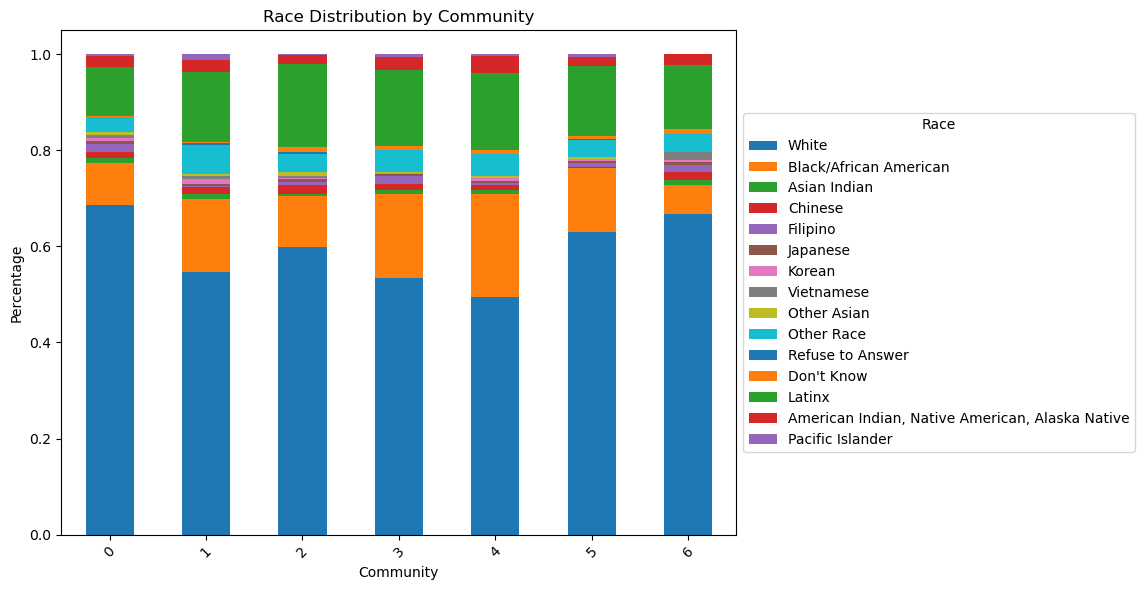

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
normalized_race_df.plot(kind='bar', stacked=True, ax=ax)

# Add title, axis labels, and rotate x-axis labels
plt.title('Race Distribution by Community')
plt.xlabel('Community')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Adjust the legend position
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(title='Race', loc='center left', bbox_to_anchor=(1, 0.5))

#print(normalized_race_df)

plt.tight_layout()
plt.show()

# chi2 analysis

In [103]:
race_counts_df = data_arms2comm_xgb_race_counts
race_counts_df

,White,Black/African American,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Other Race,Refuse to Answer,Don't Know,Latinx,"American Indian, Native American, Alaska Native",Pacific Islander
community,,,,,,,,,,,,,,,
0,725,93,11,13,18,7,5,7,7,32,2,2,108,23,4
1,321,89,5,9,1,3,6,3,3,35,3,1,86,14,7
2,373,66,2,12,4,4,1,2,6,23,3,6,107,12,1
3,371,122,6,8,12,3,1,0,2,31,1,6,110,18,4
4,240,105,4,5,2,2,3,0,2,22,0,4,78,17,2
5,340,71,0,2,4,2,2,1,2,19,1,3,79,10,3
6,125,11,2,3,3,1,1,3,0,7,0,2,25,4,0


In [104]:
# Perform chi-square test of homogeneity
chi2_race, p_value_race, dof_race, expected_race = chi2_contingency(race_counts_df)

print(f"Chi-square statistic: {chi2_race:.5g}")
print(f"p-value: {p_value_race:.5g}")
print(f"\nDegrees of freedom: {dof_race}")
print("\nContingency table (observed frequencies):")
print(race_counts_df)
print("\nExpected frequencies:")
print(pd.DataFrame(expected_race, 
                  index=race_counts_df.index, 
                  columns=race_counts_df.columns))

#Interpreting the results:

#If p-value < 0.05, reject null hypothesis: there is evidence that sex_at_birth differs across subgroups
#If p-value ≥ 0.05, fail to reject the null hypothesis: there is no evidence sex_at_birth differs across subgroups

#You might also want to look at the standardized residuals to see which specific cells contribute most to any significant difference:

Chi-square statistic: 206.72
p-value: 2.4567e-12

Degrees of freedom: 84

Contingency table (observed frequencies):
           White  Black/African American  Asian Indian  Chinese  Filipino  \
community                                                                   
0            725                      93            11       13        18   
1            321                      89             5        9         1   
2            373                      66             2       12         4   
3            371                     122             6        8        12   
4            240                     105             4        5         2   
5            340                      71             0        2         4   
6            125                      11             2        3         3   

           Japanese  Korean  Vietnamese  Other Asian  Other Race  \
community                                                          
0                 7       5           7            7  

In [105]:
# do something like this row by row for each community
# statistic, pvalue = chisquare(f_obs, f_exp)
expected_race_df = pd.DataFrame(expected_race, index=race_counts_df.index, columns=race_counts_df.columns)
print(expected_race_df)

                White  Black/African American  Asian Indian    Chinese  \
community                                                                
0          632.122483              141.119128      7.600671  13.174497   
1          350.448226               78.236337      4.213806   7.303931   
2          371.977469               83.042665      4.472675   7.752637   
3          415.633988               92.788830      4.997603   8.662512   
4          290.644775               64.885427      3.494727   6.057526   
5          322.340604               71.961409      3.875839   6.718121   
6          111.832454               24.966203      1.344679   2.330777   

            Filipino  Japanese    Korean  Vietnamese  Other Asian  Other Race  \
community                                                                       
0          11.147651  5.573826  4.813758    4.053691     5.573826   42.817114   
1           6.180249  3.090125  2.668744    2.247363     3.090125   23.737776   
2        

In [106]:
for i in range(race_counts_df.shape[0]):
    observed_indv_race = race_counts_df.iloc[i,:]
    expected_indv_race = expected_race_df.iloc[i,:]
    chi2_indv_race, p_indv_race = chisquare(observed_indv_race, expected_indv_race)
    print(f"Community {i+1}:")
    print(f"Observed values: {observed_indv_race.tolist()}")
    print(f"Expected values: {expected_indv_race.tolist()}")
    print(f"Chi-square statistic: {chi2_indv_race:.5g}")
    print(f"p-value: {p_indv_race:.5g}")
    print()
#build CI contrast to see which one is different. pairwise CI of the contrast
# visualize this difference between the groups (talk to Michael)

Community 1:
Observed values: [725, 93, 11, 13, 18, 7, 5, 7, 7, 32, 2, 2, 108, 23, 4]
Expected values: [632.1224832214765, 141.11912751677852, 7.600671140939597, 13.174496644295303, 11.14765100671141, 5.573825503355705, 4.813758389261745, 4.053691275167785, 5.573825503355705, 42.81711409395973, 2.533557046979866, 6.080536912751678, 150.23993288590603, 24.828859060402685, 5.320469798657718]
Chi-square statistic: 56.589
p-value: 4.6079e-07

Community 2:
Observed values: [321, 89, 5, 9, 1, 3, 6, 3, 3, 35, 3, 1, 86, 14, 7]
Expected values: [350.44822627037394, 78.23633748801534, 4.213806327900287, 7.303930968360499, 6.180249280920422, 3.090124640460211, 2.668744007670182, 2.2473633748801536, 3.090124640460211, 23.73777564717162, 1.4046021093000958, 3.37104506232023, 83.29290508149569, 13.765100671140939, 2.9496644295302015]
Chi-square statistic: 27.73
p-value: 0.015447

Community 3:
Observed values: [373, 66, 2, 12, 4, 4, 1, 2, 6, 23, 3, 6, 107, 12, 1]
Expected values: [371.9774688398849, 